### Парсинг Habr на Python (Python 3 + BeautifulSoup4)

In [1]:
from bs4 import BeautifulSoup
import requests

def get_html(url):
    result = requests.get(url)
    return result.text

def get_data(html):
    soup = BeautifulSoup(html, 'lxml')
    h1 = soup.find('h1', {'class' : 'page-header__info-title'})
    a = soup.find('a', {'href': 'https://habr.com/ru/post/496722/'})
    navbar = soup.find('ul', {'id': 'navbar-links'})
    li = navbar.find('li').find('a').text
    print(li)

def main():
    html = get_html('https://habr.com/ru/hub/python/')
    get_data(html)

if __name__ == '__main__':
    main()

Все потоки


In [2]:
from bs4 import BeautifulSoup
import requests

def get_html(url):
    result = requests.get(url)
    return result.text

def get_data(html):
    soup = BeautifulSoup(html, 'lxml')
    h1 = soup.find('b')
    time = soup.find('time', {'class': 'aentry-head__date-time'})
    print(time.text)

def main():
    html = get_html('https://katerinabil.livejournal.com/9973.html?media')
    get_data(html)

if __name__ == '__main__':
    main()

4 сентября 2018, 15:38


In [3]:
# запрашиваем у сайта https://www.cbr-xml-daily.ru/daily_json.js инфу о курсах валют
import requests
r = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
print(r)

<Response [200]>


In [4]:
# Так как работать с ответом сервера в виде строки неудобно, вызываем метод json(), который преобразует строку в словарь
data = r.json()
data['Valute']['INR']['ID']

'R01270'

In [5]:
# Функция с двумя параметрами: название валюты currency и формат ответа format
# при значении format 'full' будем отдавать все, что знаем о валюте
# при значении format = 'value' только значение ключа 'Value', т. е. курс (округленный до 2 цифр после запятой)
# если пользователь ввел несуществующую валюту или формат - возвращаем предупреждение

def exchange_rates(currency, format='full'):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    if currency in response:
        data = response[currency]
    else:
        return 'Unknown currency!'
    if format == 'full':
        return data  
    elif format == 'value':
        return round(data['Value'], 2)
    else:
        return 'Unknown format!'
        

exchange_rates('BYN', format='full')

{'ID': 'R01090B',
 'NumCode': '933',
 'CharCode': 'BYN',
 'Nominal': 1,
 'Name': 'Белорусский рубль',
 'Value': 29.1248,
 'Previous': 28.9504}

In [6]:
# Напишем функцию, которая по ID валюты возвращает ее название на русском языке
def currency_name(currency_ID):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    for line in response.values():
        if line['ID'] == currency_ID:
            print(line['Name'])
            
currency_name('R01565')

Польский злотый


### Парсинг на LENTA.RU

In [7]:
import requests
url = 'https://lenta.ru/articles/2018/07/01/pobeda/'
r = requests.get(url)
print(r.status_code)

200


In [8]:
# Содержимое страницы у нас лежит в r.text
# чтобы извлекать нужную нам информацию, воспользуемся библиотекой BeautifulSoup
# переведем содержимое страницы в объект BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'lxml')
soup.title.text

'Россия уделала Испанию на чемпионате мира. Вся\xa0страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru'

In [9]:
soup.find(class_='b-topic__title').text

'«Простите, парни, что поливал вас дерьмом на\xa0каждом углу»'

In [10]:
topic = soup.find('div', class_='b-topic__info')
topic.find(class_ ='g-date').text

' 21:20,  1 июля 2018'

In [11]:
soup.find(itemprop='articleBody').text

'Сборная России обыграла Испанию и вышла в четвертьфинал чемпионата мира по футболу. Многие ждали от встречи с сильнейшей команды планеты хотя бы нестыдной борьбы, а в итоге получили исторический матч — 4:3, результат превзошел все ожидания. Шок, ликование на улицах, а в соцсетях\xa0— пожар, эмоции переполняют болельщиков.Пользователи сети благодарят команду и извиняются перед тренером, в которого еще совсем недавно не верили.\n—\n  милькøш 击 (@lixoradkaenota)\n  01 июля 2018, 16:54\n\n\n\n—\n  созерцатель (@newfag_in_life)\n  01 июля 2018, 16:42\n\n\n\n—\n  Vitaly Petrov (@vitalypetrov)\n  01 июля 2018, 17:02\n\n\n\n—\n  Борисыч (@Borisich_glass)\n  01 июля 2018, 16:54\n\n\n\n—\n  Anton Ziuzenok (@a_ziuzenok)\n  01 июля 2018, 17:16\n\n\n\n—\n  Станислав Рынкевич (@salt1s)\n  01 июля 2018, 16:51\n\n\n\n—\n  Марат Касем (@MaratQasem)\n  01 июля 2018, 17:12\n\n\n\n—\n  Ромыч (@Instigator_88)\n  01 июля 2018, 17:03\n\n\n\n—\n  Milligan (@milligantop)\n  01 июля 2018, 17:03\n\n\nЧемпионат 

In [12]:
# Чаще всего ссылка на HTML-странице задается тэгом 'a', у которого в параметре 'href' прописывается текст ссылки
# Зададим поиск по тэгу 'a' в теле нашей статьи
for link in soup.find(itemprop='articleBody').find_all('a'):
    print(link)

<a href="https://lenta.ru/news/2018/07/01/russia_win/" target="_blank">обыграла</a>
<a href="https://twitter.com/lixoradkaenota/status/1013465983061778433"><time datetime="2018-07-01T16:54:54+00:00">01 июля 2018, 16:54</time></a>
<a href="https://twitter.com/newfag_in_life/status/1013462966782582785"><time datetime="2018-07-01T16:42:55+00:00">01 июля 2018, 16:42</time></a>
<a href="https://twitter.com/vitalypetrov/status/1013467931257311232"><time datetime="2018-07-01T17:02:38+00:00">01 июля 2018, 17:02</time></a>
<a href="https://twitter.com/Borisich_glass/status/1013465759799042048"><time datetime="2018-07-01T16:54:01+00:00">01 июля 2018, 16:54</time></a>
<a href="https://twitter.com/a_ziuzenok/status/1013471409979445249"><time datetime="2018-07-01T17:16:28+00:00">01 июля 2018, 17:16</time></a>
<a href="https://twitter.com/salt1s/status/1013465249989775360"><time datetime="2018-07-01T16:51:59+00:00">01 июля 2018, 16:51</time></a>
<a href="https://twitter.com/MaratQasem/status/1013470

In [13]:
# В данном случае просто извлечем значение href из этих ссылок с помощью .get('href')
for link in soup.find(itemprop='articleBody').find_all('a'):
    print(link.get('href'))

https://lenta.ru/news/2018/07/01/russia_win/
https://twitter.com/lixoradkaenota/status/1013465983061778433
https://twitter.com/newfag_in_life/status/1013462966782582785
https://twitter.com/vitalypetrov/status/1013467931257311232
https://twitter.com/Borisich_glass/status/1013465759799042048
https://twitter.com/a_ziuzenok/status/1013471409979445249
https://twitter.com/salt1s/status/1013465249989775360
https://twitter.com/MaratQasem/status/1013470315492585474
https://twitter.com/Instigator_88/status/1013468227370962944
https://twitter.com/milligantop/status/1013468156373950464
https://twitter.com/she_lova_/status/1013463135477551108
https://twitter.com/Fall_Out_Daria/status/1013463774253248512
/tags/persons/akinfeev-igor/
https://twitter.com/valyagorushkina/status/1013467293144305665
https://twitter.com/Alisa06101/status/1013466591034511369
https://twitter.com/quad_axels/status/1013469038406701056
https://twitter.com/GuyFloral/status/1013467692601184256
https://twitter.com/maleenkiymyc/st

In [14]:
# Метод read_html из pandas умеет автоматически находить на HTML-странице таблицы и возвращать их списком из датафреймов
import pandas as pd
url = 'http://www.cbr.ru'
pd.read_html(url)[0]

,Курсы валют,с 11.06.2020,с 12.06.2020
0,Доллар США,"68,6183₽","69,1219₽"
1,Евро,"77,9229₽","78,5225₽"


In [15]:
url_1 = 'http://www.cbr.ru/key-indicators/'
pd.read_html(url_1)[1]

,0,1
0,рублей за грамм,12.06.2020
1,Золото Au,"3 848,83"
2,Серебро Ag,3972
3,Платина Pt,"1 833,41"
4,Палладий Pd,"4 282,41"


In [16]:
url_1 = 'http://www.cbr.ru/key-indicators/'
pd.read_html(url_1)[2]

,0,1,2,3
0,% годовых,1 день,2-7 дней,8-30 дней
1,MIACR за 10.06.2020,525,525,—
2,RUONIA за 10.06.2020,514,NaN,NaN
3,% годовых,1 день,1 неделя,1 месяц
4,MosPrime Rate на 11.06.2020,541,550,549
5,% годовых,1 неделя,2 недели,1 месяц
6,ROISfix на 11.06.2020,531,522,507


In [17]:
url_1 = 'http://www.cbr.ru/key-indicators/'
pd.read_html(url_1)[3]

,0,1
0,млрд долл. США,NaN
1,05.06.2020,5652.0


In [18]:
url_1 = 'http://www.cbr.ru/key-indicators/'
pd.read_html(url_1)[4]

,0,1
0,млрд руб.,NaN
1,Структурный дефицит/профицит ликвидности банко...,"-1 760,8"
2,Сведения об остатках средств на корреспондентс...,NaN
3,по Российской Федерации на 11.06.2020,"2 587,7"
4,по Московскому региону на 11.06.2020,"2 427,5"
5,Объем предоставленных внутридневных кредитов ...,3399
6,Депозиты банков в Банке России на 11.06.2020,"1 579,6"
7,ОБР в обращении на 15.06.2020,7066
8,Сальдо операций Банка России по предоставлению...,1184


In [19]:
url_1 = 'http://www.cbr.ru/key-indicators/'
pd.read_html(url_1)[5]

,0,1
0,млн руб.,NaN
1,По кредитам овернайт на 11.06.2020,00
2,По ломбардным кредитам на 11.06.2020,00
3,По операциям РЕПО на 15.06.2020,NaN
4,на аукционной основе,00
5,по фиксированной ставке,698
6,По сделкам «валютный своп» на 15.06.2020,00
7,По кредитам без обеспечения на 31.12.2010,00
8,По другим кредитам на 11.06.2020,"524 952,6"


In [46]:
# используем стандарную библиотеку yaml для чтения файла с нашим сервисным ключом доступа
from yaml import safe_load
f = open('config.yaml', mode = 'r', encoding = 'utf-8')
config = safe_load(f)

In [21]:
token = config['access_token']
url = 'https://api.vk.com/method/users.get?user_id=1&v=5.52&access_token='+token
parameters = {
    'user_id': 1,
    'v': 5.52,
    'fields': 'sex,bdate,country'
}
r = requests.get(url, params = parameters)
r.text

'{"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","sex":2,"bdate":"10.10.1984","country":{"id":1,"title":"Russia"}}]}'

In [22]:
# Для улучшения читаемости можно воспользоваться библиотекой pprint, которая помогает читать JSON-формат для больших ответов
from pprint import pprint
data = r.json()
pprint(data)

{'response': [{'bdate': '10.10.1984',
               'country': {'id': 1, 'title': 'Russia'},
               'first_name': 'Pavel',
               'id': 1,
               'last_name': 'Durov',
               'sex': 2}]}


In [23]:
# Получим из этого запроса дату рождения
# для этого надо сначала обратиться к ключу response - data['response']
# теперь обращаемся к получившемуся листу из одного элемента data['response'][0]
# и, наконец, берем ключ 'bdate'
birthday = data['response'][0]['bdate']
print(birthday)

10.10.1984


### Наглядный пример использования API из VK

In [24]:
# Имеется набор ID пользователей users.
# Необходимо посчитать какую долю этих пользователей составляют женщины.
# Не учитывайте пользователей, у которых пол не указан. Пример формата ответа: 0.35. 

import requests
from yaml import safe_load
f = open('config.yaml', mode = 'r', encoding = 'utf-8')
config = safe_load(f)
token = config['access_token']

users = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

url = 'https://api.vk.com/method/users.get'

women_count = 0
men_count = 0

for user in users:
    parameters = {
        'user_id': user,
        'v': 5.52,
        'fields': 'sex',
        'access_token': token
    }
    r = requests.get(url, params = parameters)
    print(r.json())
    
    if r.json()['response'][0]['sex'] == 1:
        women_count += 1
    elif r.json()['response'][0]['sex'] == 2:
        men_count += 1

share_of_women = women_count / (women_count + men_count)
print(share_of_women)

{'response': [{'id': 1, 'first_name': 'Pavel', 'last_name': 'Durov', 'sex': 2}]}
{'response': [{'id': 2, 'first_name': 'Alexandra', 'last_name': 'Vladimirova', 'sex': 1}]}
{'response': [{'id': 3, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 0}]}
{'response': [{'id': 4, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 0}]}
{'response': [{'id': 5, 'first_name': 'Ilya', 'last_name': 'Perekopsky', 'sex': 2}]}
{'response': [{'id': 6, 'first_name': 'Nikolay', 'last_name': 'Durov', 'sex': 2}]}
{'response': [{'id': 7, 'first_name': 'Alexey', 'last_name': 'Kobylyansky', 'sex': 2}]}
{'response': [{'id': 8, 'first_name': 'Aki', 'last_name': 'Sepiashvili', 'sex': 2}]}
{'response': [{'id': 9, 'first_name': 'Nastya', 'last_name': 'Vasilyeva', 'sex': 1}]}
{'response': [{'id': 10, 'first_name': 'Alexander', 'last_name': 'Kuznetsov', 'sex': 2}]}
0.25


In [25]:
# получим список пользователей группы https://vk.com/habr
# из-за ограничения получаем только первую тысячу из 708 тыс. пользователей данной группы 
# 1000 это максимум, который может отдать API за раз
import requests
url = 'https://api.vk.com/method/groups.getMembers'
params = {
    'group_id': 'habr',
    'v': 5.73,
    'access_token': token
}
r = requests.get(url, params = params)
data = r.json()

In [26]:
# считаем количество пользователей в data, у которых ID больше 1000
len([x for x in data['response']['items'] if x > 1000]) 

959

In [27]:
# выведем на экран первые 20 пользователей из нашей первой попытки с 1000 пользователей для сверки результата выгрузки
users_for_checking = data['response']['items'][:20]
print(users_for_checking)

[6, 10, 11, 17, 24, 34, 55, 161, 169, 239, 243, 251, 341, 345, 404, 409, 453, 478, 480, 488]


In [28]:
# Напишем цикл выгрузки первых 20 пользователей со значением count = 5
# Т. е. цикл будет выгружать за 1 запрос по 5 пользователей, пока не выгрузит первые 20
# Это позволит нам проверить корректность работы цикла перед тем, как делать большие и долгие выгрузки
import requests

url = 'https://api.vk.com/method/groups.getMembers'

count = 5
offset = 0
user_ids = []
while offset < 20:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {
        'group_id': 'habr',
        'v': 5.73,
        'count': count,
        'offset': offset,
        'access_token': token
    }   
    # такой же запрос как в прошлый раз
    r = requests.get(url, params = params)
    data = r.json()   
    user_ids += data['response']['items'] 

    # увеличиваем смещение на количество строк выгрузки
    offset += count

print(user_ids)

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 10, 11, 17, 24, 34, 55, 161, 169, 239, 243, 251, 341, 345, 404, 409, 453, 478, 480, 488]


In [29]:
users_for_checking == user_ids

True

In [30]:
url = 'https://api.vk.com/method/users.get'
params = {
    'user_ids': '1,2,3',
    'v': 5.73,
    'fields': 'sex,bdate,city',
    'access_token': token
}
from pprint import pprint
data = requests.get(url, params = params)
pprint(data.json())

{'response': [{'bdate': '10.10.1984',
               'city': {'id': 2, 'title': 'Saint Petersburg'},
               'first_name': 'Pavel',
               'id': 1,
               'last_name': 'Durov',
               'sex': 2},
              {'city': {'id': 4282734, 'title': 'Overwhere'},
               'first_name': 'Alexandra',
               'id': 2,
               'last_name': 'Vladimirova',
               'sex': 1},
              {'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'last_name': '',
               'sex': 0}]}


### Пример для группы "Фотографы Беларуси"

In [31]:
# Делаем выгрузку ID всех пользователей группы https://vk.com/fotodotby
import requests
from yaml import safe_load
f = open('config.yaml', mode = 'r', encoding = 'utf-8')
config = safe_load(f)
token = config['access_token']

import time
import requests

url = 'https://api.vk.com/method/groups.getMembers'

count = 500
offset = 0
user_ids = []
while offset < 5500:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {
        'group_id': 'fotodotby',
        'v': 5.73,
        'count': count,
        'offset': offset,
        'access_token': token
    }   
    # такой же запрос как в прошлый раз
    r = requests.get(url, params = params)
    data = r.json()   
    user_ids += data['response']['items'] 

    # увеличиваем смещение на количество строк выгрузки
    offset += count

    # Чтобы не делать запросы к API слишком часто, можем искусственно замедлять выгрузку
    print('Ожидаю 0.5 секунды...')
    time.sleep(0.5)


Выгружаю 500 пользователей с offset = 0
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 500
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 1000
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 1500
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 2000
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 2500
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 3000
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 3500
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 4000
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 4500
Ожидаю 0.5 секунды...
Выгружаю 500 пользователей с offset = 5000
Ожидаю 0.5 секунды...


In [32]:
# Разбиваем наш лист с 5500 пользователей user_ids на 55 листа user_lists по 100 человек
rows_limit = 100
user_lists = []
position = 0
while position < len(user_ids):
    user_lists.append(user_ids[position:position + rows_limit])
    position += rows_limit

len(user_lists)

55

In [33]:
# Считаем количество женщин и мужчин в данной группе
women_count = 0
men_count = 0

url = 'https://api.vk.com/method/users.get'

for i in user_lists:
    for user in i:
        parameters = {
            'user_id': user,
            'v': 5.52,
            'fields': 'sex',
            'access_token': token
        }
        r1 = requests.get(url, params = parameters)
                
        if r1.json()['response'][0]['sex'] == 1:
            women_count += 1
        elif r1.json()['response'][0]['sex'] == 2:
            men_count += 1


In [34]:
total = women_count + men_count
share_of_women = round((women_count / total)*100, 1)
share_of_women

65.5

In [35]:
# Заполняем словарь названиями городов и соответствующим им количеством пользователей
city_dict = {}

url = 'https://api.vk.com/method/users.get'

for i in user_lists:
    for user in i:
        parameters = {
            'user_id': user,
            'v': 5.52,
            'fields': 'city',
            'access_token': token
        }
        r = requests.get(url, params = parameters)
        data = r.json()
        if 'city' in data['response'][0]:
            if data['response'][0]['city']['title'] in city_dict:
                city_dict[data['response'][0]['city']['title']] += 1
            else:
                city_dict[data['response'][0]['city']['title']] = 1



In [36]:
import pandas as pd

# Переводим словарь city_dict в датафрейм
df = pd.DataFrame.from_dict(city_dict, orient = 'index').reset_index()
# Переименовываем для удобства названия столбцов и сортируем датафрейм
df.rename(columns = {'index': 'city', 0: 'users'}, inplace = True)
df = df.sort_values('users', ascending = False)

In [37]:
# Возьмем города с количеством пользователей более 50, а остальные значения определим как "другие" и сгруппируем по category
df['category'] = df.apply(lambda x: x['city'] if x['users'] > 100 else 'other', axis = 1)
df = df.groupby('category').sum()

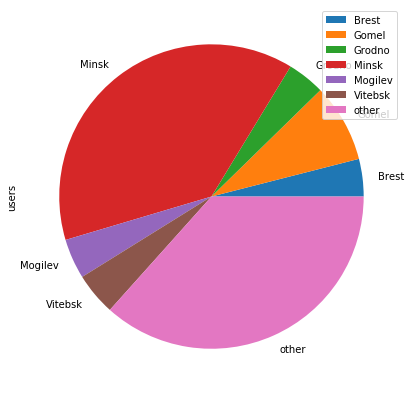

In [38]:
# Визуализируем результат
%matplotlib inline
df.head(10).plot(kind = 'pie', y = 'users', figsize= (7, 7))

In [39]:
# проанализируем последние 100 постов в группе
import requests
from pprint import pprint

url = 'https://api.vk.com/method/wall.get'
params = {
    'domain': 'fotodotby',
    'filter': 'owner',
    'count': 100,
    'offset': 0,
    'access_token': token,
    'v': 5.73
}
data = requests.get(url, params = params)

In [40]:
Started = True
stats = {}
for record in data.json()['response']['items']:
    if Started:
        Started = False    
    else:
        if 'attachments' in record:
            if 'link' in record['attachments'][0]:
                title = record['attachments'][0]['link']['title']
            elif 'photo' in record['attachments'][0]:
                title = record['attachments'][0]['photo']['text']
        elif 'copy_history' in record:
            if 'link' in record['copy_history'][0]['attachments'][0]:
                title = record['copy_history'][0]['attachments'][0]['link']['title']
            elif 'poll' in record['copy_history'][0]['attachments'][0]:
                title = record['copy_history'][0]['attachments'][0]['poll']['question']
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date'] ]


In [41]:
stats

{'#филиповец@fotodotby\n#пейзаж@fotodotby': [1, 19, 0, 1590224416],
 '#балабан@fotodotby\n#портрет@fotodotby': [0, 15, 2, 1591952414],
 '#задёрко@fotodotby\n#пейзаж@fotodotby': [0, 22, 0, 1589792417],
 '#шаповалов@fotodotby\n#макро@fotodotby': [0, 5, 0, 1589187616],
 '': [0, 6, 0, 1589276815],
 '#чимковский@fotodotby\n#пейзаж@fotodotby': [0, 21, 1, 1591858813],
 '#шатохин@fotodotby\n#пейзаж@fotodotby': [0, 11, 0, 1591429753],
 '#шабуневич@fotodotby\n#пейзаж@fotodotby': [0, 3, 0, 1589353763],
 '#макро@fotodotby\n#шаповалов@fotodotby': [0, 9, 0, 1591693213],
 '#балабан@fotodotby\n#дети@fotodotby': [0, 26, 2, 1591516900],
 'ph: [club176517576|камера криогена]': [0, 15, 0, 1591619402],
 'стек из 8 кадров': [0, 4, 0, 1591615802],
 '#задёрко@fotodotby\n#жанр@fotodotby': [0, 14, 0, 1591081881],
 '#селиванов@fotodotby\n#портрет@fotodotby': [0, 12, 0, 1591599856],
 'Странное лето 2020': [0, 24, 1, 1591437610],
 '#дубровская@fotodotby\n#дети@fotodotby': [0, 19, 0, 1591434014],
 'Первый теплый ве

In [42]:
# сортируем посты по сумме репостов, лайков и комментов
for title, line in sorted(stats.items(), key = lambda x: -(x[1][0]+x[1][1]+x[1][2]))[:10]:
    print(title, line)

Три четверти [4, 106, 0, 1589882413]
Мой инстаграм. Буду рад новым подписчикам)👍🏻😘😉
https://www.instagram.com/dmitry.medved/ [2, 35, 1, 1589536815]
Первый теплый вечер [1, 30, 0, 1591351210]
#светлова@fotodotby
#дети@fotodotby [0, 30, 1, 1590310820]
#наумовец@fotodotby
#дети@fotodotby [0, 29, 1, 1589439996]
Поля, погоды, настроение [0, 30, 0, 1589709611]
Ныряла в Солнце [0, 29, 0, 1589623211]
#балабан@fotodotby
#дети@fotodotby [0, 26, 2, 1591516900]
Странное лето 2020 [0, 24, 1, 1591437610]
Цветные сны [0, 23, 1, 1591005607]


In [43]:
from datetime import datetime, timedelta
for title, line in stats.items():
    line.append(datetime.fromtimestamp(line[3]).strftime('%Y-%m-%d'))
    print(title, line)

#филиповец@fotodotby
#пейзаж@fotodotby [1, 19, 0, 1590224416, '2020-05-23']
#балабан@fotodotby
#портрет@fotodotby [0, 15, 2, 1591952414, '2020-06-12']
#задёрко@fotodotby
#пейзаж@fotodotby [0, 22, 0, 1589792417, '2020-05-18']
#шаповалов@fotodotby
#макро@fotodotby [0, 5, 0, 1589187616, '2020-05-11']
 [0, 6, 0, 1589276815, '2020-05-12']
#чимковский@fotodotby
#пейзаж@fotodotby [0, 21, 1, 1591858813, '2020-06-11']
#шатохин@fotodotby
#пейзаж@fotodotby [0, 11, 0, 1591429753, '2020-06-06']
#шабуневич@fotodotby
#пейзаж@fotodotby [0, 3, 0, 1589353763, '2020-05-13']
#макро@fotodotby
#шаповалов@fotodotby [0, 9, 0, 1591693213, '2020-06-09']
#балабан@fotodotby
#дети@fotodotby [0, 26, 2, 1591516900, '2020-06-07']
ph: [club176517576|камера криогена] [0, 15, 0, 1591619402, '2020-06-08']
стек из 8 кадров [0, 4, 0, 1591615802, '2020-06-08']
#задёрко@fotodotby
#жанр@fotodotby [0, 14, 0, 1591081881, '2020-06-02']
#селиванов@fotodotby
#портрет@fotodotby [0, 12, 0, 1591599856, '2020-06-08']
Странное лето 202

In [44]:
yesterday = (datetime.now() - timedelta(days = 1)).strftime('%Y-%m-%d')
print(yesterday)

2020-06-13
